In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [12]:
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

In [13]:
def Create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
    xs = [i for i in range(len(ys))]

    return np.array(xs, dtype = np.float64) , np.array(ys, dtype = np.float64)


xs, ys = Create_dataset(40, 10, 2 , correlation='pos')

In [14]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
           ((mean(xs)**2) - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b

m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

1.96547842401501 0.7231707317072988


In [15]:
regression_line = [(m*x) + b for x in xs]

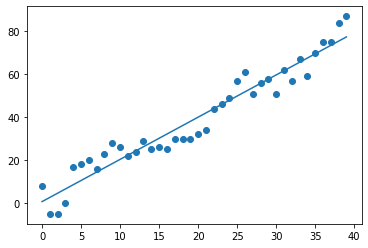

In [16]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)

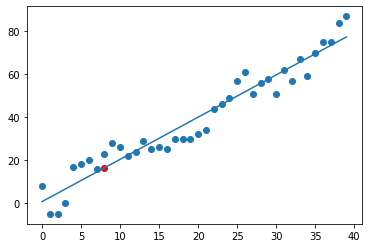

In [17]:
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(predict_x, predict_y, color ='r')
plt.scatter(xs,ys)
plt.plot(xs, regression_line)


In [18]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2 )

def coeff_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    sq_error_reg = squared_error(ys_orig, ys_line)
    sq_err_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (sq_error_reg / sq_err_y_mean)

In [19]:
r_squared = coeff_of_determination(ys, regression_line)
print(r_squared)

0.9339764749899636
